### Imputation con knn (dataset oversampling)

In [101]:
import pandas as pd

dataset = pd.read_csv('/home/biso/Tirocinio/tirocinio/datiLussazioniDefinitivi.csv', delimiter=';')
dataset

,CASE_ID,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,INDICATIONFORTHR,HIPRL,YEAR,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_01,LUX_CR
0,1,3,0,"56,5","31,6",1,5,4,R,2021,...,4,1,46.0,15,"17,7",NO,NaN,NaN,0,0
1,2,8,0,"9,4","40,9",1,5,4,L,2021,...,5,1,40.0,25,"27,7",NO,NaN,NaN,0,0
2,3,10,0,"15,1333333333333",35,1,5,4,R,2021,...,4,1,42.0,20,"27,7",YES,NaN,NaN,0,0
3,4,6,0,"83,4333333333333","18,7",0,6,4,L,2021,...,4,0,40.0,18,"24,2",NO,NaN,NaN,0,0
4,5,5,0,"7,53333333333333","36,4",1,4,4,L,2021,...,5,1,42.0,28,"25,9",YES,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,3193,3,0,"57,4333333333333",25,1,5,2,R,2010,...,3,0,43.0,32,"27,7",NO,35.0,CRANIO-DORSALE,1,1
3193,3194,5,1,"49,2333333333333",38,1,6,2,R,2009,...,4,0,48.0,26,"25,9",NO,18.0,CRANIO-DORSALE,1,1
3194,3195,13,0,"38,0333333333333",43,1,5,2,R,2008,...,4,0,48.0,4,"11,5",NO,30.0,CRANIO-DORSALE,1,1
3195,3196,5,1,"11,5333333333333",28,1,5,2,R,2001,...,4,0,52.0,10,"31,3",NO,26.0,CRANIO-DORSALE,1,1


In [102]:
import sys

sys.path.append('/home/biso/Tirocinio/tirocinio/base_lib')

In [103]:
import functions as func
import models 

import imputation as imp 

In [104]:
dataset = func.clean_dataset(dataset)

cols = ['n_luxation', 'first_lux_days_after_thr', 'DIRECTION']
dataset[cols] = dataset[cols].fillna(-1)

In [105]:
dataset.isna().sum()

CASE_ID                     0
BREED                       0
GENDER_01                   0
AGEATSURGERYmo              0
BODYWEIGHTKG                0
Taglia                      0
BCS                         2
INDICATIONFORTHR            0
HIPRL                       1
YEAR                        0
n_luxation                  0
GENERATION                  0
STEMSIZE                    0
CUPSIZE                     0
NECKSIZE                    0
HEADSIZE                    0
ALO                         1
CUPRETROVERSION             0
STEMANTEVERSIONREAL         1
RECTUSFEMORISM.RELEASE      0
first_lux_days_after_thr    0
DIRECTION                   0
LUX_01                      0
LUX_CR                      0
dtype: int64

Le righe che contengono valori nan sono 5.

In [77]:
dataset_valori_nan = dataset[dataset.isnull().any(axis=1)]
dataset_valori_nan

,CASE_ID,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,INDICATIONFORTHR,HIPRL,YEAR,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_01,LUX_CR
505,506,10,1,31.400000,26.4,1,5.0,4,1.0,2019,...,4,0,45.0,18,NaN,0,-1.0,-1.0,0,0
1397,1398,10,0,7.600000,28.0,1,NaN,4,0.0,2011,...,4,0,42.0,20,31.3,0,-1.0,-1.0,0,0
2327,2328,3,0,14.866667,70.0,1,5.0,4,0.0,2018,...,10,4,NaN,28,25.9,0,-1.0,-1.0,0,0
2516,2517,3,1,23.000000,53.7,1,5.0,2,NaN,2021,...,6,2,40.0,15,19.2,0,-1.0,-1.0,0,1
3176,3177,7,0,14.100000,56.0,1,NaN,2,0.0,2011,...,4,1,40.0,15,39.5,0,1626.0,0.0,1,1


In [78]:
binary_features = ['HIPRL', 'GENDER_01', 'LUX_01', 'LUX_CR', 'Taglia']

In [79]:
# faccio imputation con knn (weight='distance')
dataset_imputed = imp.knn_imputation(dataset, binary_features)

Miglior parametro n_neighbors: 3


/home/biso/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/biso/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/home/biso/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/biso/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError

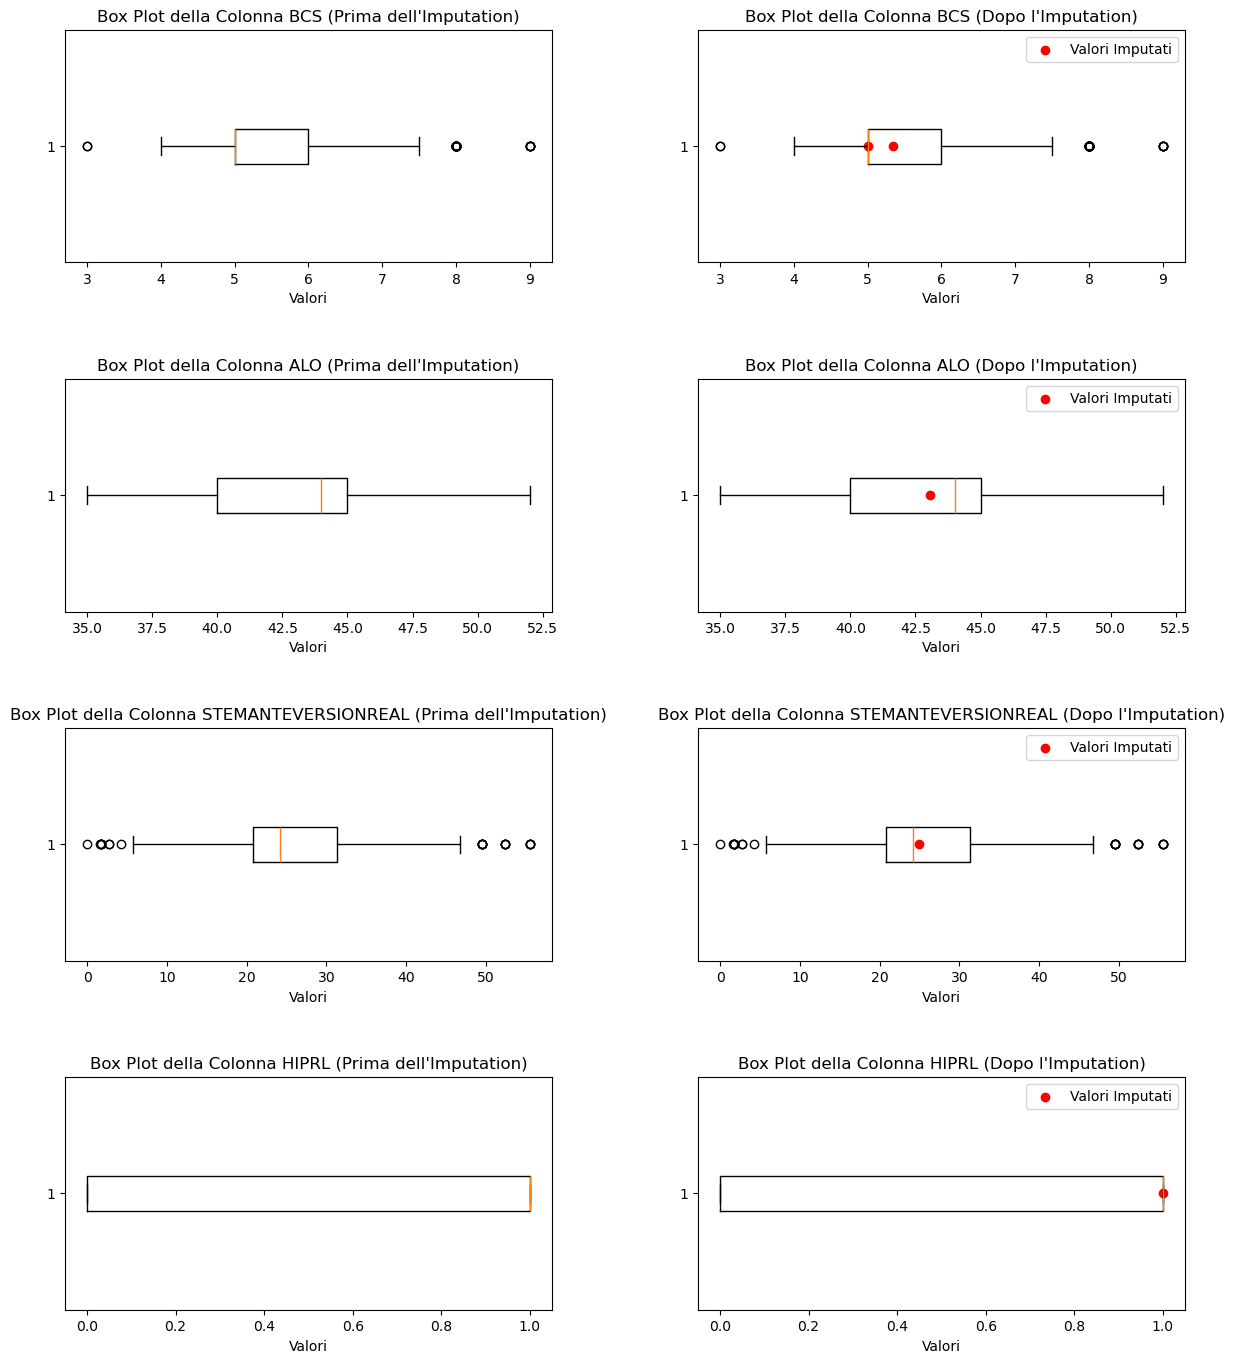

In [80]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(14, 16))

new_values_bcs = dataset_imputed[dataset['BCS'].isna()]['BCS']

# Box plot e scatter plot per la colonna BCS
plt.subplot(4, 2, 1)
plt.boxplot(dataset['BCS'].dropna(), vert=False)
plt.title('Box Plot della Colonna BCS (Prima dell\'Imputation)')
plt.xlabel('Valori')

plt.subplot(4, 2, 2)
plt.boxplot(dataset_imputed['BCS'], vert=False)
plt.scatter(new_values_bcs, [1]*len(new_values_bcs), color='red', label='Valori Imputati')
plt.title('Box Plot della Colonna BCS (Dopo l\'Imputation)')
plt.xlabel('Valori')
plt.legend()

new_values_alo = dataset_imputed[dataset['ALO'].isna()]['ALO']

# Box plot e scatter plot per la colonna ALO
plt.subplot(4, 2, 3)
plt.boxplot(dataset['ALO'].dropna(), vert=False)
plt.title('Box Plot della Colonna ALO (Prima dell\'Imputation)')
plt.xlabel('Valori')

plt.subplot(4, 2, 4)
plt.boxplot(dataset_imputed['ALO'], vert=False)
plt.scatter(new_values_alo, [1]*len(new_values_alo), color='red', label='Valori Imputati')
plt.title('Box Plot della Colonna ALO (Dopo l\'Imputation)')
plt.xlabel('Valori')
plt.legend()

new_values_STEMANTEVERSIONREAL = dataset_imputed[dataset['STEMANTEVERSIONREAL'].isna()]['STEMANTEVERSIONREAL']

# Box plot e scatter plot per la colonna STEMANTEVERSIONREAL
plt.subplot(4, 2, 5)
plt.boxplot(dataset['STEMANTEVERSIONREAL'].dropna(), vert=False)
plt.title('Box Plot della Colonna STEMANTEVERSIONREAL (Prima dell\'Imputation)')
plt.xlabel('Valori')

plt.subplot(4, 2, 6)
plt.boxplot(dataset_imputed['STEMANTEVERSIONREAL'], vert=False)
plt.scatter(new_values_STEMANTEVERSIONREAL, [1]*len(new_values_STEMANTEVERSIONREAL), color='red', label='Valori Imputati')
plt.title('Box Plot della Colonna STEMANTEVERSIONREAL (Dopo l\'Imputation)')
plt.xlabel('Valori')
plt.legend()

new_values_HIPRL = dataset_imputed[dataset['HIPRL'].isna()]['HIPRL']

# Box plot e scatter plot per la colonna HIPRL
plt.subplot(4, 2, 7)
plt.boxplot(dataset['HIPRL'].dropna(), vert=False)
plt.title('Box Plot della Colonna HIPRL (Prima dell\'Imputation)')
plt.xlabel('Valori')

plt.subplot(4, 2, 8)
plt.boxplot(dataset_imputed['HIPRL'], vert=False)
plt.scatter(new_values_HIPRL, [1]*len(new_values_HIPRL), color='red', label='Valori Imputati')
plt.title('Box Plot della Colonna HIPRL (Dopo l\'Imputation)')
plt.xlabel('Valori')
plt.legend()

# Aggiungere spazio tra i grafici e ai bordi
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3, left=0.1, right=0.9, top=0.9, bottom=0.1)  # Aggiungere spazio tra i grafici e ai bordi

plt.show()

In [81]:
dataset_imputed[dataset['BCS'].isna()]['BCS']

1397    5.341589
3176    5.000000
Name: BCS, dtype: float64

In [82]:
dataset_imputed[dataset['HIPRL'].isna()]['HIPRL']

2516    1.0
Name: HIPRL, dtype: float64

In [83]:
dataset_imputed[dataset['STEMANTEVERSIONREAL'].isna()]['STEMANTEVERSIONREAL']

505    24.869209
Name: STEMANTEVERSIONREAL, dtype: float64

In [84]:
dataset_imputed[dataset['ALO'].isna()]['ALO']

2327    43.063233
Name: ALO, dtype: float64

In [85]:
dataset = dataset_imputed

In [86]:
dataset.isna().sum()

CASE_ID                     0
BREED                       0
GENDER_01                   0
AGEATSURGERYmo              0
BODYWEIGHTKG                0
Taglia                      0
BCS                         0
INDICATIONFORTHR            0
HIPRL                       0
YEAR                        0
n_luxation                  0
GENERATION                  0
STEMSIZE                    0
CUPSIZE                     0
NECKSIZE                    0
HEADSIZE                    0
ALO                         0
CUPRETROVERSION             0
STEMANTEVERSIONREAL         0
RECTUSFEMORISM.RELEASE      0
first_lux_days_after_thr    0
DIRECTION                   0
LUX_01                      0
LUX_CR                      0
dtype: int64

In [87]:
dataset

,CASE_ID,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,INDICATIONFORTHR,HIPRL,YEAR,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_01,LUX_CR
0,1,3,0,56.500000,31.6,1,5.0,4,1.0,2021,...,4,1,46.0,15,17.7,0,-1.0,-1.0,0,0
1,2,8,0,9.400000,40.9,1,5.0,4,0.0,2021,...,5,1,40.0,25,27.7,0,-1.0,-1.0,0,0
2,3,10,0,15.133333,35.0,1,5.0,4,1.0,2021,...,4,1,42.0,20,27.7,1,-1.0,-1.0,0,0
3,4,6,0,83.433333,18.7,0,6.0,4,0.0,2021,...,4,0,40.0,18,24.2,0,-1.0,-1.0,0,0
4,5,5,0,7.533333,36.4,1,4.0,4,0.0,2021,...,5,1,42.0,28,25.9,1,-1.0,-1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,3193,3,0,57.433333,25.0,1,5.0,2,1.0,2010,...,3,0,43.0,32,27.7,0,35.0,0.0,1,1
3193,3194,5,1,49.233333,38.0,1,6.0,2,1.0,2009,...,4,0,48.0,26,25.9,0,18.0,0.0,1,1
3194,3195,13,0,38.033333,43.0,1,5.0,2,1.0,2008,...,4,0,48.0,4,11.5,0,30.0,0.0,1,1
3195,3196,5,1,11.533333,28.0,1,5.0,2,1.0,2001,...,4,0,52.0,10,31.3,0,26.0,0.0,1,1


In [88]:
# Definizione di X e y

# insieme di predittori
feature_cols = ['CASE_ID', 'BREED', 'GENDER_01', 'AGEATSURGERYmo', 'BODYWEIGHTKG', 'Taglia', 'BCS', 'INDICATIONFORTHR', 'HIPRL', 
                'YEAR', 'GENERATION', 'STEMSIZE', 'CUPSIZE', 'NECKSIZE', 'HEADSIZE', 'ALO', 'CUPRETROVERSION', 'STEMANTEVERSIONREAL', 
                'RECTUSFEMORISM.RELEASE', 'LUX_CR', 'n_luxation', 'DIRECTION', 'first_lux_days_after_thr']
X = dataset[feature_cols]

# variabile di risposta, è una variabile binaria
y = dataset['LUX_01']

In [89]:
dataset = func.oversampling(X, y)

In [90]:
dataset

,CASE_ID,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,INDICATIONFORTHR,HIPRL,YEAR,...,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,LUX_CR,n_luxation,DIRECTION,first_lux_days_after_thr,target
0,1,3,0,56.500000,31.600000,1,5.000000,4,1.000000,2021,...,1,46.000000,15,17.700000,0,0,-1.000000,-1.000000,-1.000000,0
1,2,8,0,9.400000,40.900000,1,5.000000,4,0.000000,2021,...,1,40.000000,25,27.700000,0,0,-1.000000,-1.000000,-1.000000,0
2,3,10,0,15.133333,35.000000,1,5.000000,4,1.000000,2021,...,1,42.000000,20,27.700000,1,0,-1.000000,-1.000000,-1.000000,0
3,4,6,0,83.433333,18.700000,0,6.000000,4,0.000000,2021,...,0,40.000000,18,24.200000,0,0,-1.000000,-1.000000,-1.000000,0
4,5,5,0,7.533333,36.400000,1,4.000000,4,0.000000,2021,...,1,42.000000,28,25.900000,1,0,-1.000000,-1.000000,-1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6107,3161,3,1,10.806642,32.910039,1,5.000000,3,0.813148,2016,...,0,44.626295,15,21.603109,0,0,1.186852,0.813148,79.747409,1
6108,3178,10,1,9.873255,24.331731,1,5.000000,2,0.000000,2021,...,0,41.287395,16,16.774790,0,1,1.742521,0.742521,36.742521,1
6109,3057,10,1,9.078890,28.669075,1,5.774419,2,0.000000,2021,...,0,42.323258,16,19.311169,0,1,1.225581,1.000000,41.646517,1
6110,3177,10,0,37.406131,31.542214,1,5.000000,4,1.000000,2009,...,0,46.156661,15,39.435180,0,0,1.614446,0.000000,1149.102200,1


In [91]:
dataset = dataset.sample(frac=1, random_state=42)

In [92]:
dataset = func.drop_cols(dataset)

In [93]:
feature_cols = ['BREED', 'GENDER_01', 'AGEATSURGERYmo', 'BODYWEIGHTKG', 'Taglia', 'BCS', 'INDICATIONFORTHR', 'HIPRL', 
                'YEAR', 'GENERATION', 'STEMSIZE', 'CUPSIZE', 'NECKSIZE', 'HEADSIZE', 'ALO', 'CUPRETROVERSION', 'STEMANTEVERSIONREAL', 
                'RECTUSFEMORISM.RELEASE', 'LUX_CR']

X = dataset[feature_cols]
y = dataset['target']

# la feature LUX_01 è stata cambiata in target dopo l'oversampling

### Regressione logistica sulla feature target

In [94]:
model = models.logistic_regression_model(X, y)

Report di classificazione:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       911
           1       0.73      0.81      0.77       923

    accuracy                           0.76      1834
   macro avg       0.76      0.75      0.75      1834
weighted avg       0.76      0.76      0.75      1834



### Regressione logistica con cross validation

In [95]:
model = models.logistic_regression_cv_model(X, y, cv=5)

Report di classificazione:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       911
           1       0.73      0.80      0.77       923

    accuracy                           0.75      1834
   macro avg       0.75      0.75      0.75      1834
weighted avg       0.75      0.75      0.75      1834



### Regressione logistica con grid search cv

In [96]:
param_grid = {
    'C': [0.01, 0.1, 1]
}

model = models.logistic_regression_gridsearchcv_model(X=X,
                                                      y=y,
                                                      param_grid=param_grid,
                                                      cv=5,
                                                      scoring='accuracy')

Report di classificazione:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       911
           1       0.74      0.81      0.77       923

    accuracy                           0.76      1834
   macro avg       0.76      0.76      0.76      1834
weighted avg       0.76      0.76      0.76      1834

Migliori parametri: {'C': 1}


### Albero di decisione

In [97]:
model = models.decision_tree_model(X=X,
                                   y=y,
                                   max_depth=15)

Report di classificazione:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       911
           1       0.92      0.93      0.93       923

    accuracy                           0.92      1834
   macro avg       0.92      0.92      0.92      1834
weighted avg       0.92      0.92      0.92      1834



### Albero di decisione con grid search cv

In [98]:
param_grid = {
    'max_depth': [5, 10, 15]
}

model = models.decision_tree_gridsearchcv_model(X=X,
                                                y=y,
                                                param_grid=param_grid,
                                                cv=10,
                                                scoring='accuracy')

Report di classificazione:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       911
           1       0.92      0.93      0.93       923

    accuracy                           0.92      1834
   macro avg       0.92      0.92      0.92      1834
weighted avg       0.92      0.92      0.92      1834

Migliori parametri: {'max_depth': 15}


### Random forest

In [99]:
model = models.random_forest_model(X=X,
                                   y=y,
                                   n_estimators=10,
                                   max_depth=10)

Report di classificazione:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       911
           1       0.95      0.94      0.94       923

    accuracy                           0.94      1834
   macro avg       0.94      0.94      0.94      1834
weighted avg       0.94      0.94      0.94      1834



### Random forest con grid search cv

In [100]:
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'n_estimators': [7, 9, 11, 13]
}

model = models.random_forest_gridsearchcv_model(X=X,
                                                y=y,
                                                param_grid=param_grid,
                                                cv=10,
                                                scoring='accuracy')

Report di classificazione:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       911
           1       0.96      0.95      0.95       923

    accuracy                           0.95      1834
   macro avg       0.95      0.95      0.95      1834
weighted avg       0.95      0.95      0.95      1834

Migliori parametri: {'max_depth': 20, 'n_estimators': 9}
